In [1]:
# Heart Disease Case Study
#Objective : Predict the presence of heart disease in a pateint.

#Data contain a binary outcome HD for 454 patients who presented with chest pain. An outcome value of Yes indicates the presence of heart disease based on an angiographic test, while No means no heart disease

There are 13 predictors including Age, Sex, Chol (a cholesterol measurement), and other heart and lung function measurements

In the data, some of the predictors, such as Sex, Thal (Thallium stress test), and ChestPain, are qualitative

Data Source-UCI Machine Learning Repository

#Data Description

(age)-> age in years
(sex)-sex (1 = male; 0 = female)
(chestPain)
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

(RestBP)->resting blood pressure (in mm Hg on admission to the hospital)
(chol)->serum cholestoral in mg/dl
(fbs)->(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
(restecg)->resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

(MaxHR)->maximum heart rate achieved
(exang)->exercise induced angina (1 = yes; 0 = no)
(oldpeak)->ST depression induced by exercise relative to rest
(slope)->the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

(ca)->number of major vessels (0-3) colored by flourosopy
(thal)->3 = normal; 6 = fixed defect; 7 = reversable defect
(AHD) (the predicted attribute) ->diagnosis of heart disease (angiographic disease status) Yes/No

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
import os
os.getcwd()

'/home/labsuser/ML dataset'

In [17]:
os.chdir("/home/labsuser/ML dataset")

In [18]:
pd.read_csv("heart_train.csv")


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,49,1,nonanginal,118,149,0,2,126,0,0.8,1,3.0,normal,Yes
1,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,Yes
2,59,1,typical,160,273,0,2,125,0,0.0,1,0.0,normal,Yes
3,59,1,asymptomatic,140,177,0,0,162,1,0.0,1,1.0,reversable,Yes
4,47,1,nonanginal,108,243,0,0,152,0,0.0,1,0.0,normal,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,43,0,asymptomatic,132,341,1,2,136,1,3.0,2,0.0,reversable,Yes
313,63,1,asymptomatic,140,187,0,2,144,1,4.0,1,2.0,reversable,Yes
314,58,1,nonanginal,140,211,1,2,165,0,0.0,1,0.0,normal,No
315,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,Yes


In [19]:
# load the dataset
train = pd.read_csv("heart_train.csv")
train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,49,1,nonanginal,118,149,0,2,126,0,0.8,1,3.0,normal,Yes
1,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,Yes
2,59,1,typical,160,273,0,2,125,0,0.0,1,0.0,normal,Yes
3,59,1,asymptomatic,140,177,0,0,162,1,0.0,1,1.0,reversable,Yes
4,47,1,nonanginal,108,243,0,0,152,0,0.0,1,0.0,normal,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,43,0,asymptomatic,132,341,1,2,136,1,3.0,2,0.0,reversable,Yes
313,63,1,asymptomatic,140,187,0,2,144,1,4.0,1,2.0,reversable,Yes
314,58,1,nonanginal,140,211,1,2,165,0,0.0,1,0.0,normal,No
315,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,Yes


In [20]:
train.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,49,1,nonanginal,118,149,0,2,126,0,0.8,1,3.0,normal,Yes
1,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,Yes
2,59,1,typical,160,273,0,2,125,0,0.0,1,0.0,normal,Yes
3,59,1,asymptomatic,140,177,0,0,162,1,0.0,1,1.0,reversable,Yes
4,47,1,nonanginal,108,243,0,0,152,0,0.0,1,0.0,normal,Yes


In [21]:
train.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.00000,317.000000,317.000000,314.000000
mean,54.504732,0.659306,131.488959,250.195584,0.148265,0.974763,149.643533,0.33123,1.053943,1.596215,0.675159
std,9.040563,0.474692,17.398095,60.530824,0.355924,0.990138,22.211492,0.47140,1.124761,0.590846,0.950645
min,34.000000,0.000000,94.000000,131.000000,0.000000,0.000000,71.000000,0.00000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.00000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,130.000000,242.000000,0.000000,0.000000,152.000000,0.00000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,282.000000,0.000000,2.000000,165.000000,1.00000,1.600000,2.000000,1.000000
max,77.000000,1.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.00000,5.600000,3.000000,3.000000


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        317 non-null    int64  
 1   Sex        317 non-null    int64  
 2   ChestPain  317 non-null    object 
 3   RestBP     317 non-null    int64  
 4   Chol       317 non-null    int64  
 5   Fbs        317 non-null    int64  
 6   RestECG    317 non-null    int64  
 7   MaxHR      317 non-null    int64  
 8   ExAng      317 non-null    int64  
 9   Oldpeak    317 non-null    float64
 10  Slope      317 non-null    int64  
 11  Ca         314 non-null    float64
 12  Thal       317 non-null    object 
 13  AHD        317 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [23]:
# converting yes to 1 and no to 0 for AHD
train['AHD']=train['AHD'].apply(lambda x : 1 if x=='Yes' else 0)

In [24]:
train['AHD'],_=pd.factorize(train['AHD'],sort=)

SyntaxError: invalid syntax (<ipython-input-24-924ccd960f35>, line 1)

In [25]:
# we can see that AHD is changed to 0
train.head(10)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,49,1,nonanginal,118,149,0,2,126,0,0.8,1,3.0,normal,1
1,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,1
2,59,1,typical,160,273,0,2,125,0,0.0,1,0.0,normal,1
3,59,1,asymptomatic,140,177,0,0,162,1,0.0,1,1.0,reversable,1
4,47,1,nonanginal,108,243,0,0,152,0,0.0,1,0.0,normal,1
5,52,0,nonanginal,136,196,0,2,169,0,0.1,2,0.0,normal,0
6,50,1,nonanginal,140,233,0,0,163,0,0.6,2,1.0,reversable,1
7,56,0,nontypical,140,294,0,2,153,0,1.3,2,0.0,normal,0
8,58,0,typical,150,283,1,2,162,0,1.0,1,NaN,normal,0
9,67,0,nonanginal,152,277,0,0,172,0,0.0,1,1.0,normal,0


In [26]:
train.tail(30)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
287,52,1,nonanginal,172,199,1,0,162,0,0.5,1,0.0,reversable,0
288,57,1,asymptomatic,110,335,0,0,143,1,3.0,2,1.0,reversable,1
289,61,1,nonanginal,150,243,1,0,137,1,1.0,2,0.0,normal,0
290,46,1,asymptomatic,140,311,0,0,120,1,1.8,2,2.0,reversable,1
291,51,1,asymptomatic,140,299,0,0,173,1,1.6,1,0.0,reversable,1
292,51,0,nonanginal,130,256,0,2,149,0,0.5,1,0.0,normal,0
293,57,1,asymptomatic,165,289,1,2,124,0,1.0,2,3.0,reversable,1
294,61,1,asymptomatic,120,260,0,0,140,1,3.6,2,1.0,reversable,1
295,56,1,nontypical,120,240,0,0,169,0,0.0,3,0.0,normal,0
296,47,1,nonanginal,138,257,0,2,156,0,0.0,1,0.0,normal,0


In [27]:
# We have to use label encoding for ChestPain and Thal so that he string columns can be conveted to categorical columns


In [30]:
# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
le.fit(train['ChestPain'])
train['ChestPain']=pd.Categorical(le.transform(train['ChestPain']))

In [35]:
train.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,49,1,1,118,149,0,2,126,0,0.8,1,3.0,normal,1
1,63,0,0,108,269,0,0,169,1,1.8,2,2.0,normal,1
2,59,1,3,160,273,0,2,125,0,0.0,1,0.0,normal,1
3,59,1,0,140,177,0,0,162,1,0.0,1,1.0,reversable,1
4,47,1,1,108,243,0,0,152,0,0.0,1,0.0,normal,1


In [37]:
le.fit(train['Thal'])
train['Thal']=pd.Categorical(le.transform(train['Thal']))


In [38]:
train.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,49,1,1,118,149,0,2,126,0,0.8,1,3.0,1,1
1,63,0,0,108,269,0,0,169,1,1.8,2,2.0,1,1
2,59,1,3,160,273,0,2,125,0,0.0,1,0.0,1,1
3,59,1,0,140,177,0,0,162,1,0.0,1,1.0,2,1
4,47,1,1,108,243,0,0,152,0,0.0,1,0.0,1,1


In [40]:
train = train.dropna()

In [42]:
# select features, AHD is a traget column and others are predictors
y_train = train['AHD']
X_train = train.iloc[:,0:13]

In [43]:
# This will have predictors
X_train.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,49,1,1,118,149,0,2,126,0,0.8,1,3.0,1
1,63,0,0,108,269,0,0,169,1,1.8,2,2.0,1
2,59,1,3,160,273,0,2,125,0,0.0,1,0.0,1
3,59,1,0,140,177,0,0,162,1,0.0,1,1.0,2
4,47,1,1,108,243,0,0,152,0,0.0,1,0.0,1


In [44]:
# This will have target columns
y_train[:10]

0     1
1     1
2     1
3     1
4     1
5     0
6     1
7     0
9     0
10    1
Name: AHD, dtype: int64

In [46]:
?tree.DecisionTreeClassifier

Object `tree.DecisionTreeClassifier` not found.


In [51]:
# train the decision tree, It can be Entropy instead of gini as well
from sklearn import tree
dtree = tree.DecisionTreeClassifier(criterion ='gini')
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

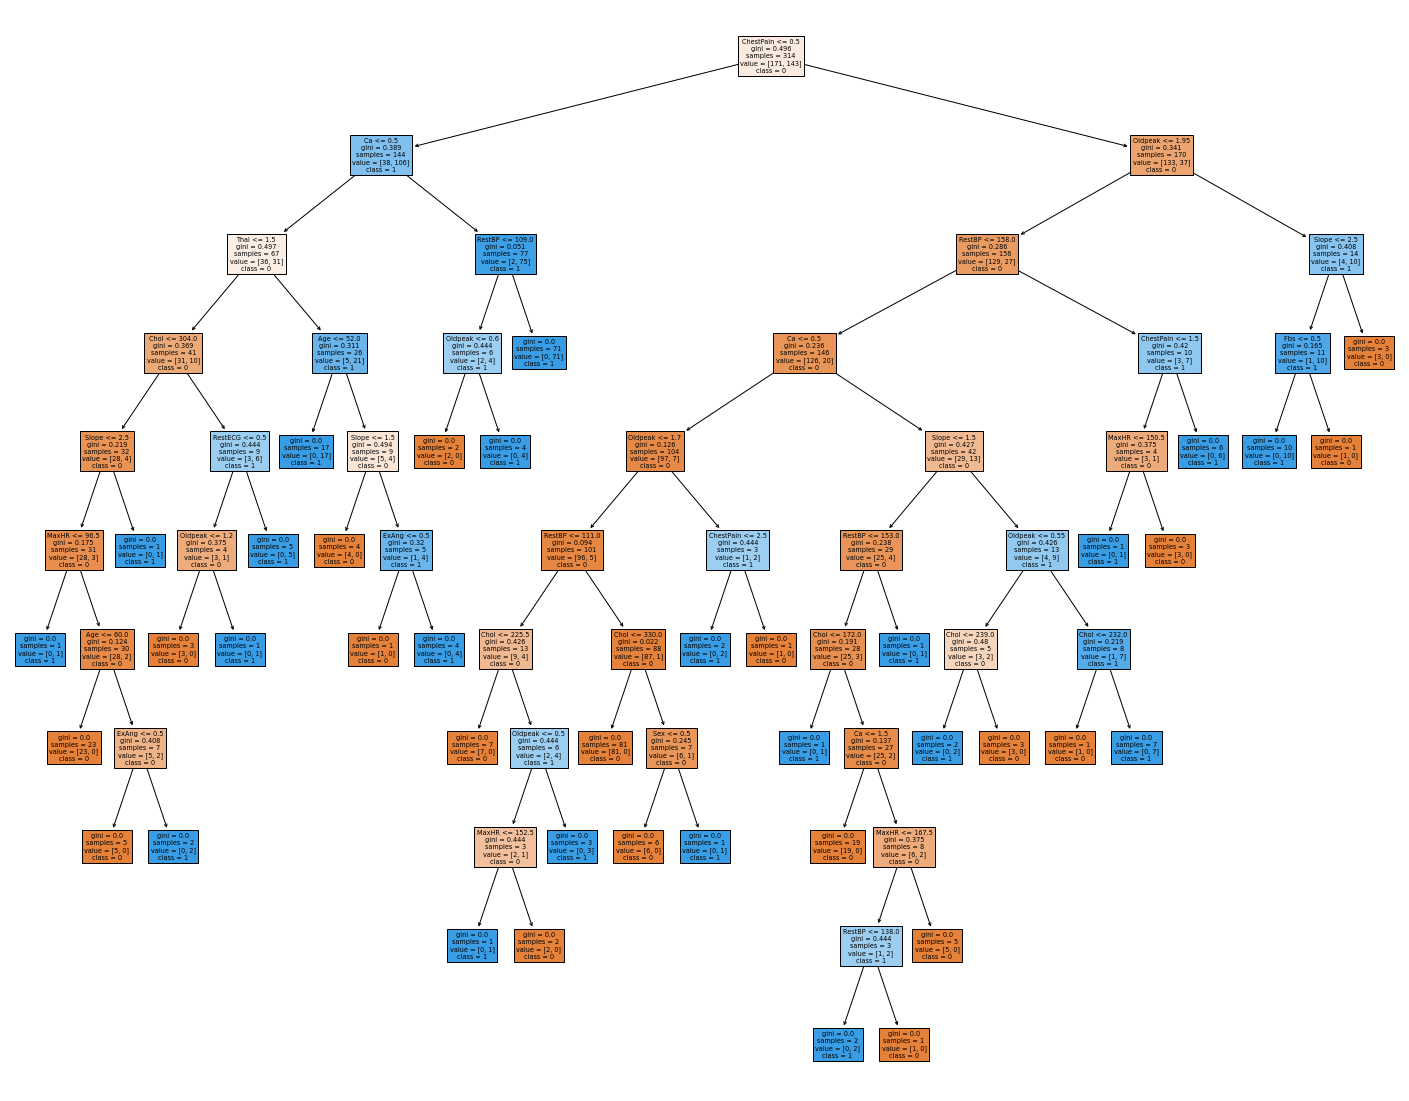

In [54]:
# code to see the tree structure
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=X_train.columns,  
                   class_names=['0','1'],
                   filled=True)

In [ ]:
# when the sample size is low, it is over fitting the data, we can see this from the above decision tree.Now if model tries to learn, it will get confuse with each and every record and now we will check the confusionmatrix

In [55]:
# this is not good because the model has learn every data, the moment we introduce the new record, the model will fail.0 are 0 clasified and 1 are 1 classified, there is no misclassification
y_train_pred_prob = dtree.predict_proba(X_train)
y_train_pred_class= y_train_pred_prob[:,1]>0.5
pd.crosstab(y_train,y_train_pred_class)

col_0,False,True
AHD,,
0,171,0
1,0,143


In [56]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='gini',min_samples_leaf=10,max_depth=3)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [ ]:
#y_train_pred_prob[0]

In [ ]:
#y_train[1]

In [ ]:
y_train_pred = dtree.predict(X_train)
y_train_pred[:5]

In [ ]:
pd.crosstab(y_train,y_train_pred)

In [57]:
# Now we will do the Predictions on 
# Predictions on Test Data Set
# load the data
df_test = pd.read_csv('heart_test.csv')
df_test.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
1,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2,normal,Yes
2,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0,reversable,Yes
3,57,1,asymptomatic,140,192,0,0,148,0,0.4,2,0,fixed,No
4,56,1,nonanginal,130,256,1,2,142,1,0.6,2,1,fixed,Yes


In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        137 non-null    int64  
 1   Sex        137 non-null    int64  
 2   ChestPain  137 non-null    object 
 3   RestBP     137 non-null    int64  
 4   Chol       137 non-null    int64  
 5   Fbs        137 non-null    int64  
 6   RestECG    137 non-null    int64  
 7   MaxHR      137 non-null    int64  
 8   ExAng      137 non-null    int64  
 9   Oldpeak    137 non-null    float64
 10  Slope      137 non-null    int64  
 11  Ca         137 non-null    int64  
 12  Thal       137 non-null    object 
 13  AHD        137 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 15.1+ KB


In [59]:
df_test['AHD']=df_test['AHD'].apply(lambda x : 1 if x=='Yes' else 0)
#df_test['AHD'],_=pd.factorize(df_test['AHD'],sort=False)

le.fit(df_test['ChestPain'])
df_test['ChestPain']=pd.Categorical(le.transform(df_test['ChestPain']))

le.fit(df_test['Thal'])
df_test['Thal']=pd.Categorical(le.transform(df_test['Thal']))
df_test=df_test.dropna()

df_test.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,37,1,1,130,250,0,0,187,0,3.5,3,0,1,0
1,62,0,0,140,268,0,2,160,0,3.6,3,2,1,1
2,53,1,0,140,203,1,2,155,1,3.1,3,0,2,1
3,57,1,0,140,192,0,0,148,0,0.4,2,0,0,0
4,56,1,1,130,256,1,2,142,1,0.6,2,1,0,1


In [60]:
# select features
y_test = df_test['AHD']
X_test = df_test.iloc[:,0:13]


In [61]:
y_test_pred_prob = dtree.predict_proba(X_test)
y_test_pred_prob[10]

array([0.8630137, 0.1369863])

In [62]:
y_test_pred_class = dtree.predict(X_test)

In [63]:
# the moment you introduce the test data, there is a misclassification, however it was not in train data, so we have make a stable miodel that is genralized model and we do hyperparameter tuning
#pd.crosstab(y_test,y_test_pred_prob[:,1]>0.5)
pd.crosstab(y_test,y_test_pred_class)

col_0,0,1
AHD,,
0,64,14
1,8,51


In [65]:
# test the decision tree, It can be Entropy instead of gini as well
from sklearn import tree
dtree = tree.DecisionTreeClassifier(criterion ='gini')
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

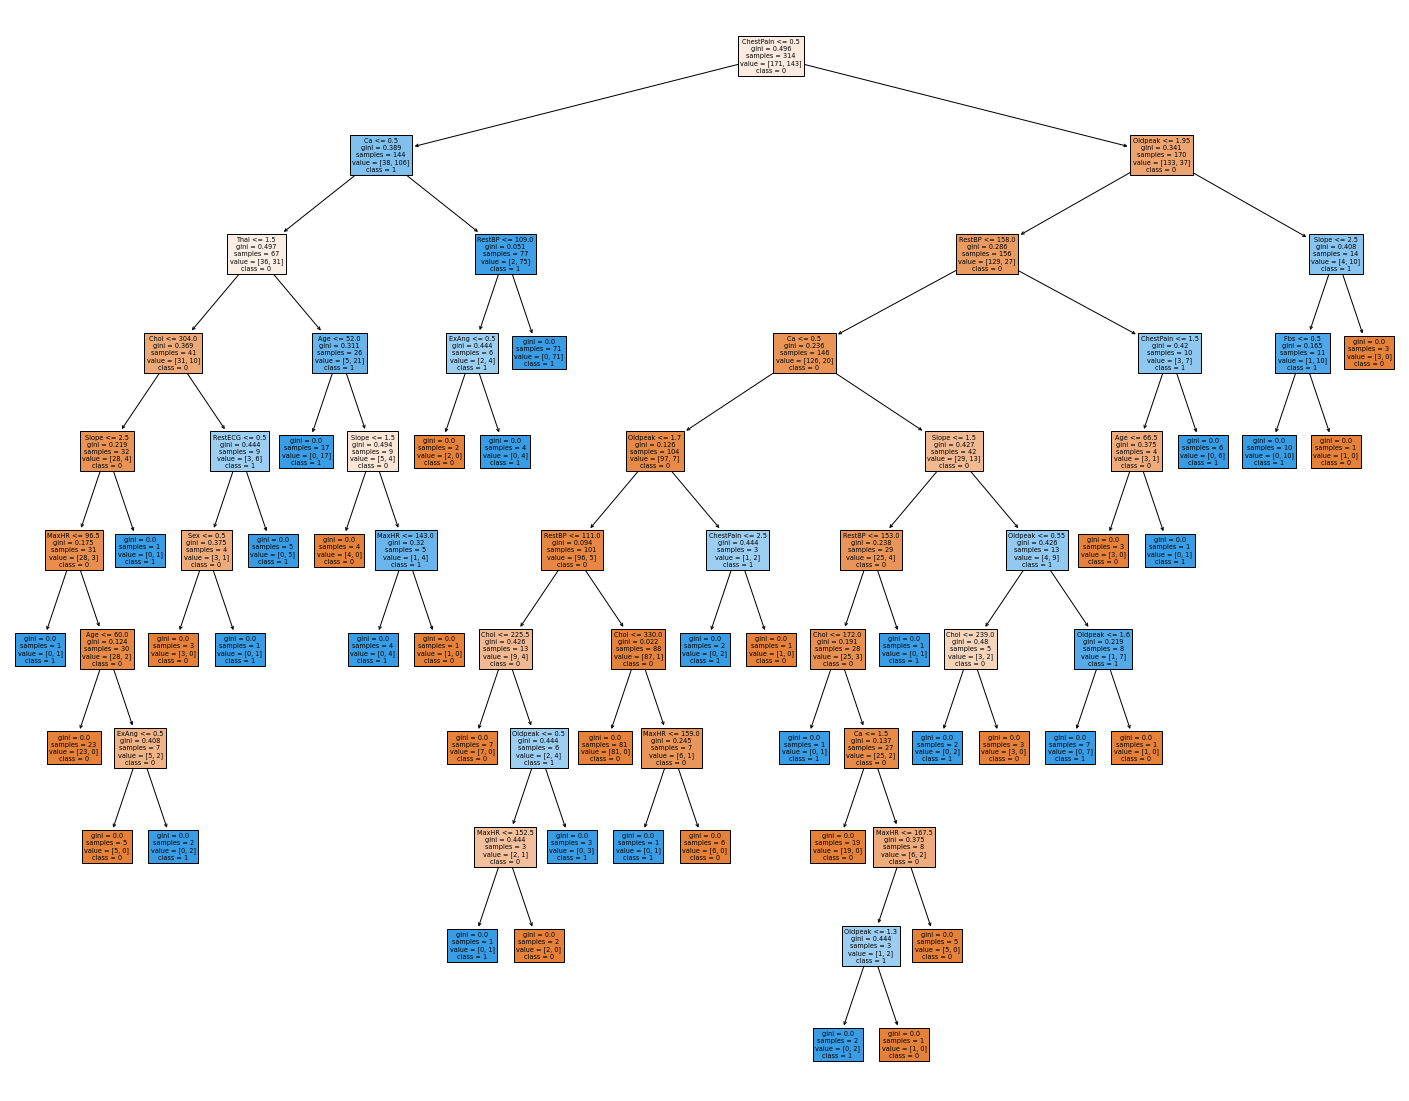

In [68]:
# code to see the tree structure
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=X_train.columns,  
                   class_names=['0','1'],
                   filled=True)